In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Cars93.csv')
X = data[['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']].values
y = data['Price'].values.reshape(-1,1)
k=['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']

loo = LeaveOneOut()
loo.get_n_splits(X)



13


93

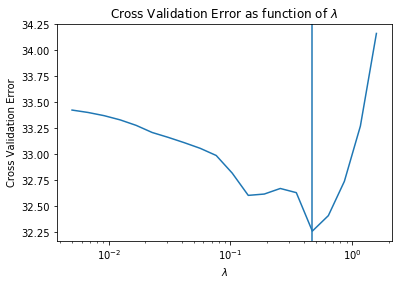

In [60]:

rango=5*np.logspace(-3, -0.5, num=20)

mset=[]
for a in rango:
    mse=[]
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = linear_model.Lasso(alpha=a)
        clf.fit(X_train,y_train)
        mse.append(mean_squared_error(clf.predict(X_test), y_test))
    mset.append(np.mean(mse))

_min=rango[np.argmin(mset)]
plt.title(r'Cross Validation Error as function of $\lambda$')
plt.ylabel('Cross Validation Error')
plt.xlabel(r'$\lambda$')
plt.semilogx(rango,mset)  
plt.axvline(_min)


[-0.         -0.          0.          0.05824997 -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.        ]
0.05824997432589463 Horsepower


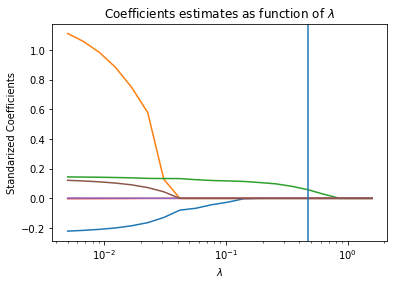

In [72]:
coefs=[]
for a in rango:
    clf = linear_model.Lasso(alpha=a,normalize=True)
    clf.fit(X,y)
    coefs.append(clf.coef_)
    
coefs=np.array(coefs)

plt.title(r'Coefficients estimates as function of $\lambda$')
plt.ylabel('Standarized Coefficients')
plt.xlabel(r'$\lambda$')
[plt.semilogx(rango, coefs[:,i]) for i in range(1,7)]
plt.axvline(_min)



In [82]:

[print("Parámetro: %s Coeficiente %.2f"%(k[i],coefs[np.argmin(mset),i])) for i in range(13)]
print("\nEl único parámetro relevante es: %s con un coeficiente %.5f"%(k[3],coefs[np.argmin(mset),3]))


Parámetro: MPG.city Coeficiente -0.00
Parámetro: MPG.highway Coeficiente -0.00
Parámetro: EngineSize Coeficiente 0.00
Parámetro: Horsepower Coeficiente 0.06
Parámetro: RPM Coeficiente -0.00
Parámetro: Rev.per.mile Coeficiente -0.00
Parámetro: Fuel.tank.capacity Coeficiente 0.00
Parámetro: Passengers Coeficiente 0.00
Parámetro: Length Coeficiente 0.00
Parámetro: Wheelbase Coeficiente 0.00
Parámetro: Width Coeficiente 0.00
Parámetro: Turn.circle Coeficiente 0.00
Parámetro: Weight Coeficiente 0.00

El único parámetro relevante es: Horsepower con un coeficiente 0.05825
